In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from CLR.clr_callback import CyclicLR
from LRF.lr_finder import LRFinder

In [10]:
import numpy as np

In [11]:
xtrain_128=np.load('data/x_train_128.npy')
print("RUN HOGAYA")

RUN HOGAYA


In [27]:
ytrain = np.load('data/y_train.npy')
print("RUN HOGAYA")

RUN HOGAYA


In [28]:
ytrain = tf.keras.utils.to_categorical(ytrain, 3)

In [13]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [14]:
from os import listdir
from os.path import isfile, join

In [21]:
resnet_weights_path = 'code/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
NUM_CLASSES = 3
DENSE_LAYER_ACTIVATION = 'softmax'

In [22]:
#resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
NUM_CLASSES = 3
DENSE_LAYER_ACTIVATION = 'softmax'

def first_keras_model():
    model1 = Sequential()

    # 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
    # NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
    model1.add(ResNet50(include_top = False,input_shape=(128,128,3), pooling = 'avg', weights = resnet_weights_path))
    model1.add(BatchNormalization())

    # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
    model1.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

    # Say not to train first layer (ResNet) model as it is already trained
    
    return model1

def Second_keras_model():
    model2 = Sequential()

    # 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
    # NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
    model2.add(ResNet50(include_top = False,input_shape=(224,224,3), pooling = 'avg',weights = resnet_weights_path))
    model2.add(BatchNormalization())

    # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
    model2.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
    model2.load_weights("model1.h5")

    # Say not to train first layer (ResNet) model as it is already trained
    
    return model2

def Third_keras_model():
    model3 = Sequential()

    # 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
    # NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
    model3.add(ResNet50(include_top = False,input_shape=(229,229,3), pooling = 'avg',weights = resnet_weights_path))
    model3.add(BatchNormalization())

    # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
    model3.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
    model3.load_weights("model2.h5")

    # Say not to train first layer (ResNet) model as it is already trained
    
    return model3

In [23]:
def test(xt, yt):
    model = tf.keras.models.load_model('model2.h5')
    xt = np.load('data/x_test.npy')
    yt = np.load('data/y_test.npy')
    y_pred = model.predict(xt)
    confusion_matrix_info(yt, np.argmax(y_pred, axis=1),title='confusion_matrix_test')

In [24]:
batch_size=32
optimizer=Adam()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 6147      
Total params: 23,602,051
Trainable params: 10,243
Non-trainable params: 23,591,808
_________________________________________________________________
None
Train on 13958 samples
Epoch 1/3
13958/13958 [==============================] - 104s 7ms/sample - loss: 1.3747 - accuracy: 0.4170
Epoch 2/3
13958/13958 [==============================] - 80s 6ms/sample - loss: 1.0229 - accuracy: 0.6207
Epoch 3/3
 4352/13958 [========>.....................] - ETA: 55s - loss: 1.7057 - accuracy: 0.6792

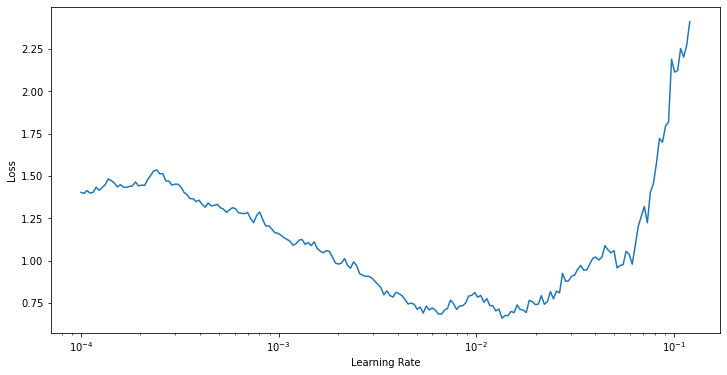

In [29]:
model = first_keras_model()
model.layers[0].trainable = False
print(model.summary())
opt=Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

start_lr = 1e-4
end_lr = 1e0
no_epochs = 3

lr_finder = LRFinder(min_lr=start_lr, max_lr=end_lr)

# Perform LR finder
model.fit(xtrain_128, ytrain, batch_size=32, callbacks=[lr_finder], epochs=no_epochs, verbose=1)

In [30]:
clr_step_size = int(4 * (len(xtrain_128)/32))
base_lr = 1e-4
max_lr = 1e-2
mode='triangular'

In [31]:
clr = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)

In [32]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Fit data to model
model.fit(xtrain_128, ytrain, batch_size=32, callbacks=[clr], epochs=no_epochs, verbose=1)


Train on 13958 samples
Epoch 1/3
13958/13958 [==============================] - 54s 4ms/sample - loss: 0.5600 - accuracy: 0.7931
Epoch 2/3
13958/13958 [==============================] - 50s 4ms/sample - loss: 0.5054 - accuracy: 0.8390
Epoch 3/3
13958/13958 [==============================] - 51s 4ms/sample - loss: 0.6285 - accuracy: 0.8385
